In [33]:
from matplotlib import rcParams
from cycler import cycler
rcParams['font.family'] = 'Century Gothic'
rcParams['font.sans-serif'] = ['Tahoma']
rcParams['font.weight'] = 'bold'
rcParams['font.size'] = '13'
# rcParams['axes.prop_cycle'] = cycler(color=['w'])

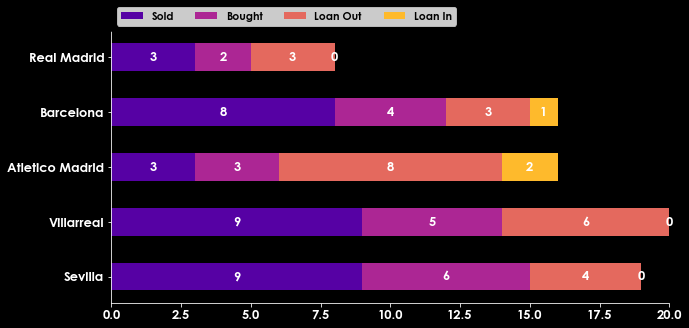

In [37]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Sold','Bought','Loan Out','Loan In']
results = {
    'Real Madrid': [3, 2, 3,0],
    'Barcelona': [8, 4, 3, 1],
    'Atletico Madrid': [3, 3, 8, 2],
    'Villarreal': [9, 5, 6,0],
    'Sevilla': [9, 6, 4,0]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1) #finds cumulative value
    category_colors = plt.get_cmap('plasma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 5))
    fig.set_facecolor('#000')
    ax.patch.set_facecolor('#000')
    ax.invert_yaxis()
    ax.xaxis.set_visible(True) #labels on x axis
    ax.set_xlim(0, np.sum(data, axis=1).max())#setting x axis limits
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['bottom'].set_color('w')
    ax.spines['left'].set_color('w')
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    return fig, ax

survey(results, category_names)
plt.show()